In [10]:
#Import packages

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

pd.set_option('display.max_rows', 500)
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [6]:
### Load the dataset into a dataframe

train = pd.read_csv('/Users/Jaimon/Desktop/All_files/MS_in_DS/Machine_learning/Module3/train.csv')
test = pd.read_csv('/Users/Jaimon/Desktop/All_files/MS_in_DS/Machine_learning/Module3/test.csv')


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
#Sample view
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [17]:
#Check how the Sale Price(dependent variable) is distributed.
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


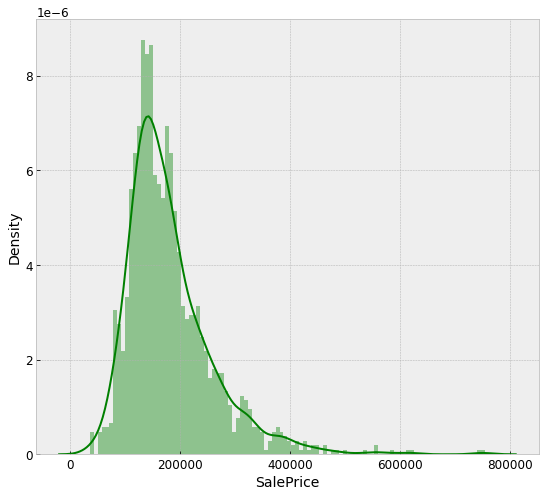

In [18]:
#Plot the SalePrice data using density curve
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Findings: Based on this data, we can observe that the prices are positively skewed, indicating that there are some unusually high values above 500,000. To achieve a normal distribution of the independent variable (SalePrice) for machine learning purposes, it would be necessary to eventually remove these outliers.

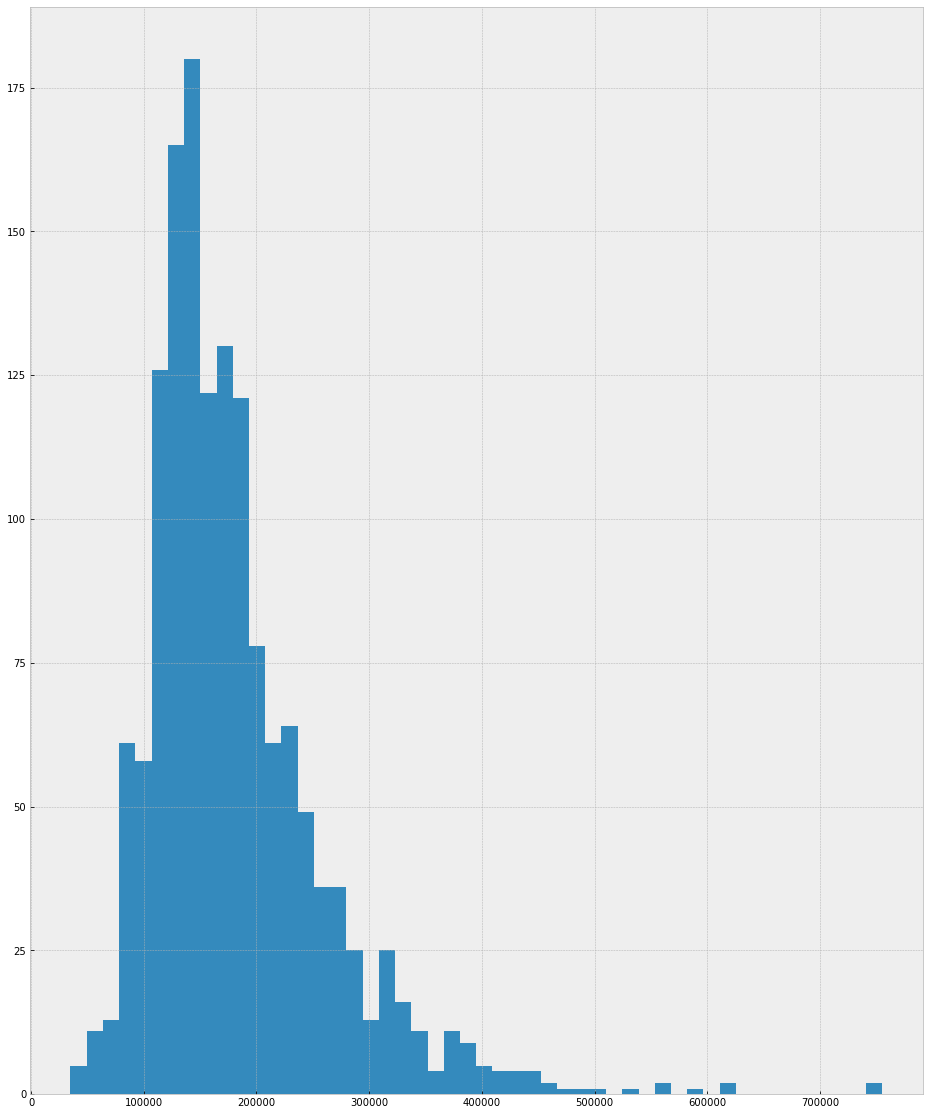

In [19]:
#Plot SalePrice using a histogram
train['SalePrice'].hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10);



Findings: Majority of the house sale price range between 100,000 and 200,000. There are few houses with prices ranging from 500K to 700K and above. These can potentially be discarded from the model since there's very less data in these ranges.

[]

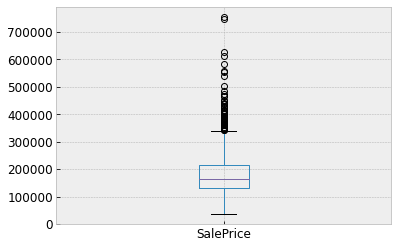

In [20]:
#Box plot of SalePrice
b_plot = train.boxplot(column = 'SalePrice') 
b_plot.plot()

Findings: In the above box plot, it is further clear that there are outliers in the data above 500K range. The 25th percentile is around 130K, 75th percentile is close to 210K and the median is around 150K. Most of the data points fall between 0 to 350K sice the whiskers of the box tend to be between that range. The data seems to be skewed to the right since the majority of the observation cluster towards the lower side and there is a long tail.

# Investigate missing data and outliers.

In [21]:
#Get number of rows of missing data in each field using isnull.
missing_data = train.isnull().sum()
missing_data.sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [22]:
train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

Findings: There are 19 fields in the data having null values.Majority of the missing values seem to be in PoolQC, MiscFeature, Alley and Fence which have missing data > 1000 rows. 

# Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [23]:
#Find features strongly correlated with SalePrice using corr() function
df_corr =train.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


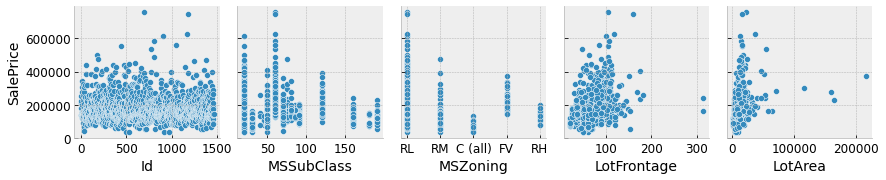

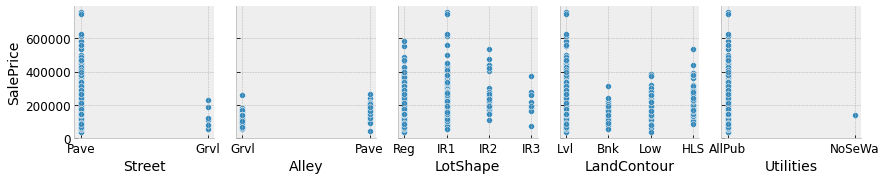

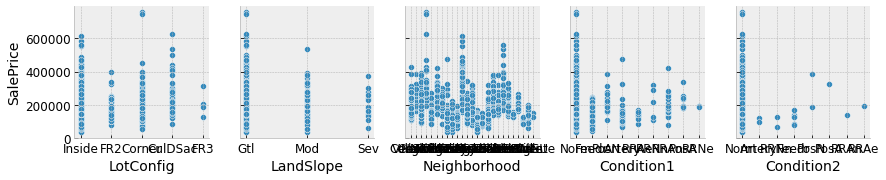

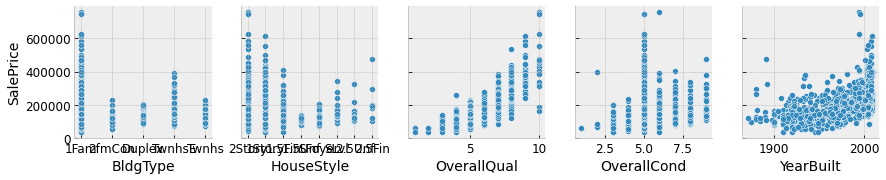

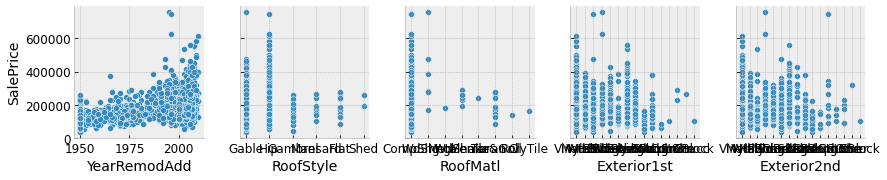

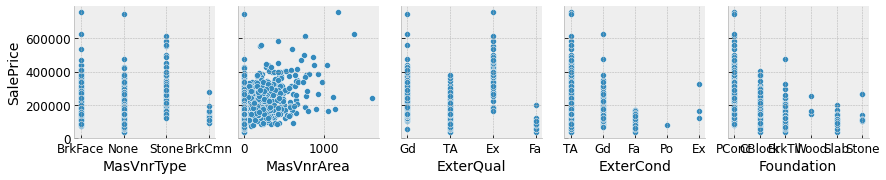

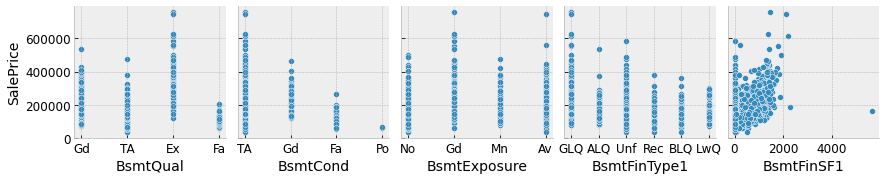

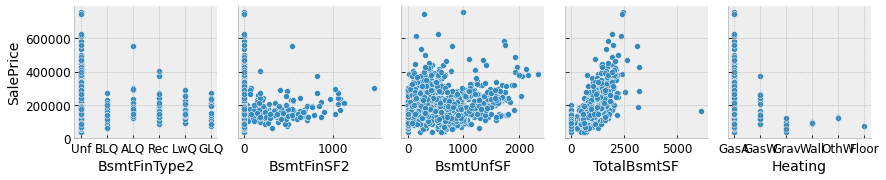

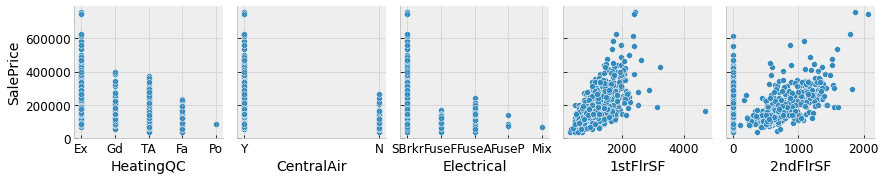

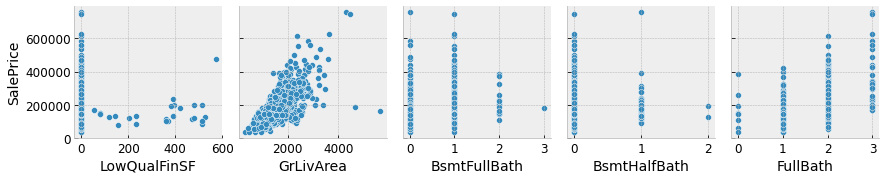

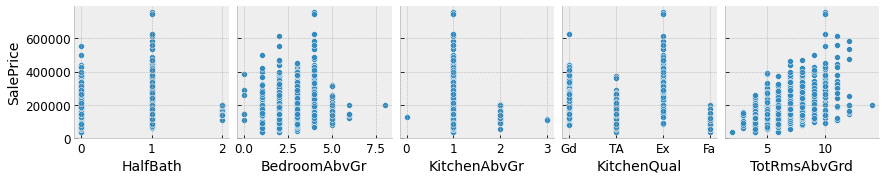

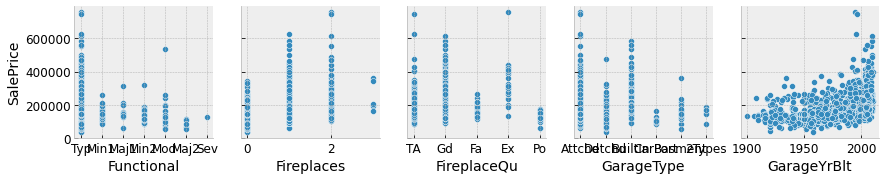

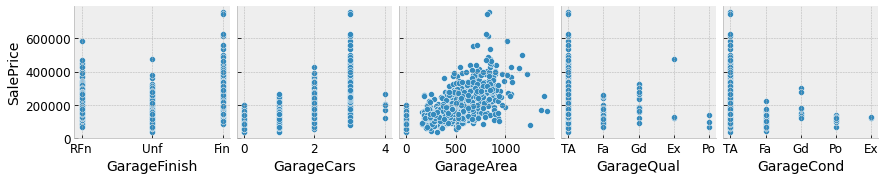

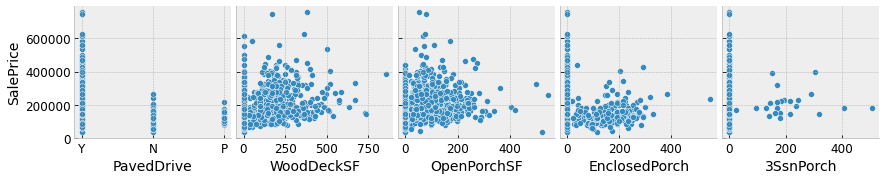

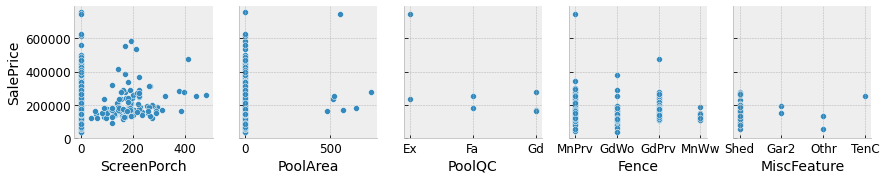

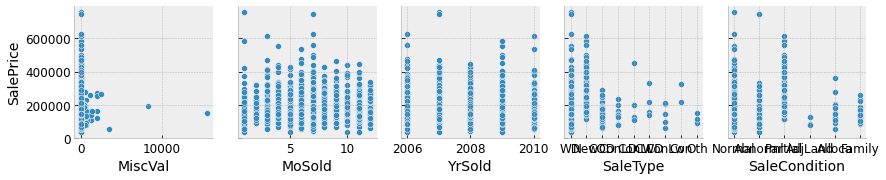

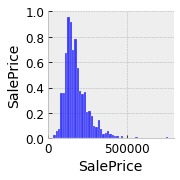

In [24]:
#Pair plots to check if there are linear relationships between all columns and SalePrice
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['SalePrice'])

From the above pair plot, it is evident that all the below 10 variables have a linear relationship with the saleprice. These seem to be good predictors for the target variable. As Saleprice increases, the values in each of these columns seem to increase as well.

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101

In [25]:
#get correlations of all independent variables to the dependent variable
import operator
individual_features_df = []
for i in range(0, len(train.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = train[[train.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[train.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
             Id: -0.021916719443430967
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.50710096711

There seems to be a lot of columns with  correlation score of 1 which just means the values in each of them do not have any direct impact on the saleprice and so are the columns which have negative correlation scores. It will be interesting to see the model results after including just the features with correlation score of 0.4 to 0.79.

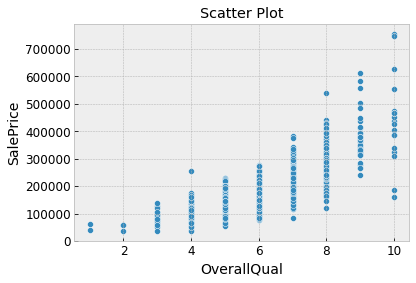

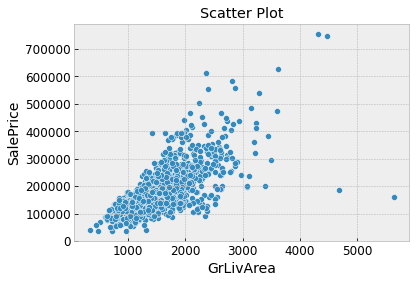

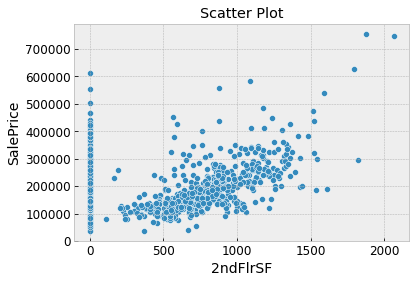

In [26]:
#I chose 3 variables due to its high correlation coefficients - OverallQual,
#GrLivArea,2ndFlrSF
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'x' is the predictor, and 'y' is the dependent variable
#Overall material and finish of the house and SalePrice
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')
plt.title('Scatter Plot')
plt.show()

#Ground floor living area and SalePrice
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.title('Scatter Plot')
plt.show()

#2nd floor square feet and SalePrice
sns.scatterplot(data=train, x='2ndFlrSF', y='SalePrice')
plt.title('Scatter Plot')
plt.show()




Findings: Overall these three predictors OverallQual,GrLivArea and 2ndFlrSF seem to have a linear relationship with the dependent variable based on the scatterplots.

In [27]:
from scipy.stats import pearsonr

#Check pearson correlation coefficient of Overall quality of material and finishings
#vs SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(train['SalePrice'], train['OverallQual'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.7909816005838048
p-value: 2.185675268e-313


In [28]:
from scipy.stats import pearsonr

#Check Pearson correlation coefficient of Ground floor living area and SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(train['SalePrice'], train['GrLivArea'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.708624477612652
p-value: 4.518033646780971e-223


In [29]:
from scipy.stats import pearsonr

#Check Pearson correlation coefficient of 2nd floor square feet and SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(train['SalePrice'], train['2ndFlrSF'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.31933380283206786
p-value: 5.764335119183061e-36


Findings: Overall the correlation coefficients indicates a strong positive linear relationship between the 3 independent and dependent variable - SalePrice.
The OverallQual variable seems to have the most positive relationship with SalePrice since it has the highest the correlation coefficient compared to the other two variables. Also, the p-value of p-values of all variables is very close to zero and  it provides strong evidence to reject the null hypothesis of no correlation. Therefore, it suggests that there is a statistically significant linear relationship between the variables.

# Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [30]:
#Extract all object types to a dataframe called df_not_num. This dataframe will contain all the categorical variables in the data
df_not_num = train.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 43 non numerical features including:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


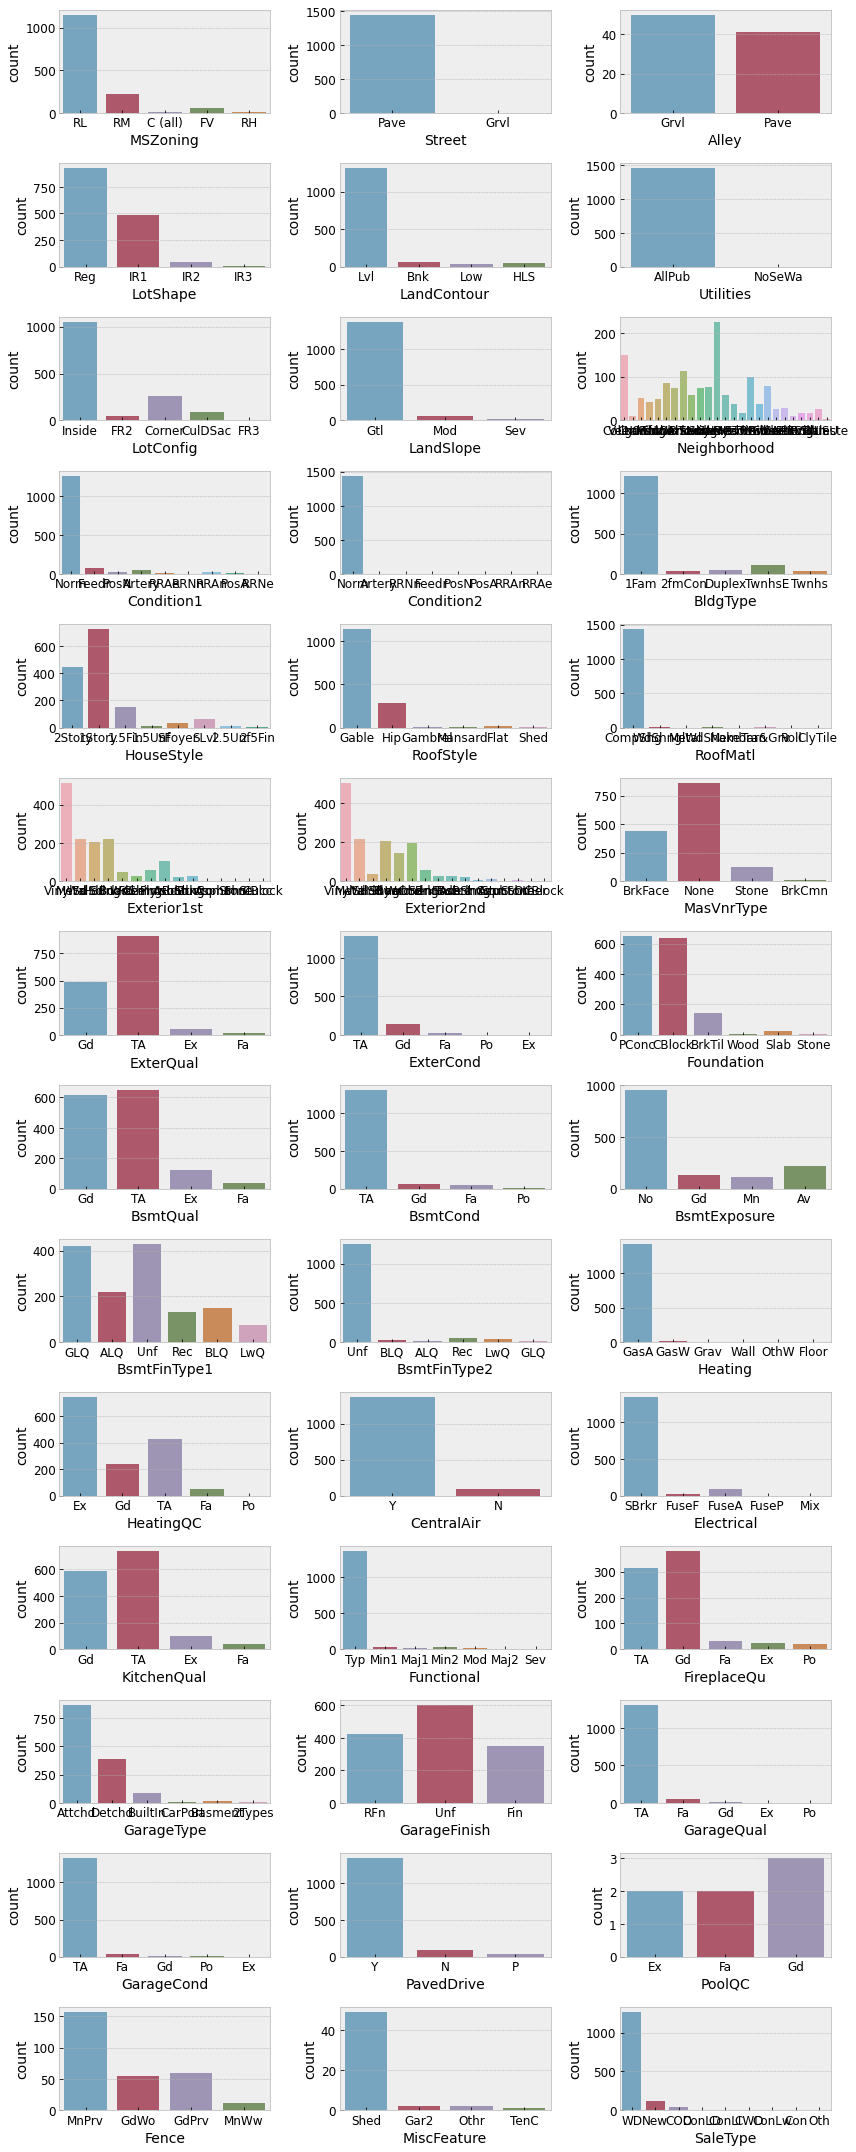

In [32]:
#Create sub plots for each categorical variable to see count distributions of all categorical values
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.tick_params
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [33]:
#Create another variable called HasPool which differentiates houses with and without a pool. If the house has a pool 
#then encode as 1 else 0.
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train.head()
test['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
#Check the count of houses having a pool vs not having a pool
train['HasPool'].value_counts()
test['HasPool'].value_counts()


0    1452
1       7
Name: HasPool, dtype: int64

Findings: It looks like a lot of houses do not have pools. Only 7 out of 1460 houses have pools and the rest do not.There is 1 house priced at 745K with an abnormal sale condition. The rest of the house sales seem to be between the range of 160K and 275K. 


# Using the dependent variable, perform both min-max and standard scaling in Python.

In [37]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and 'dependent_variable' is the column name of the dependent variable
dependent_variable = train['SalePrice'].values.reshape(-1, 1)  # Reshape to a 2D array

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(dependent_variable)

# Standard Scaling
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(dependent_variable)

# Convert the scaled arrays back to a DataFrame (if needed)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=['scaled_dependent_variable'])
standard_scaled_df = pd.DataFrame(standard_scaled, columns=['scaled_dependent_variable'])

In [38]:
#min_max_scaled_df

sorted_df = min_max_scaled_df.sort_values('scaled_dependent_variable', ascending=False)
sorted_df


,scaled_dependent_variable
691,1.000000
1182,0.986113
1169,0.819470
898,0.800940
803,0.761051
...,...
30,0.007082
533,0.006110
968,0.004166
916,0.000571


In [25]:
sorted_df = standard_scaled_df.sort_values('scaled_dependent_variable', ascending=False)
sorted_df

,scaled_dependent_variable
691,7.228819
1182,7.102899
1169,5.591855
898,5.423840
803,5.062146
...,...
30,-1.774484
533,-1.783299
968,-1.800928
916,-1.833528


# Conduct Cross Validation Design

Conduct EDA and provide appropriate visualizations in the process

In [43]:
#place all categorical features for train and test in separate dataframes

train_categorical_columns = train.select_dtypes(include=['object']).columns

test_categorical_columns = test.select_dtypes(include=['object']).columns

In [44]:
#place all continuous columns for train and test in separate dataframes
train_continuous_columns = train.select_dtypes(exclude='object').columns
test_continuous_columns = test.select_dtypes(exclude='object').columns


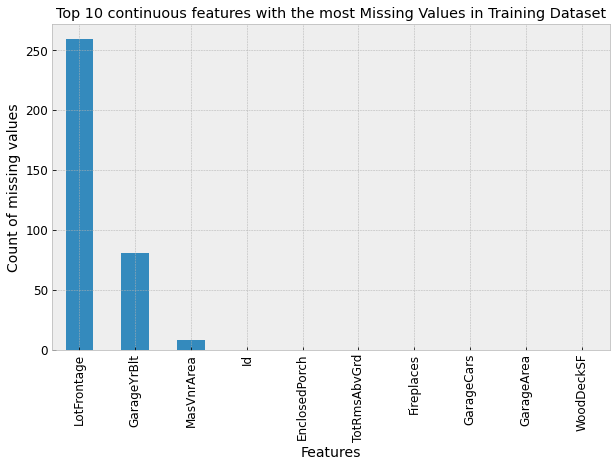

In [45]:
#Count of missing values in continuous columns in train set
missing_values_train = train[train_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
missing_values_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 10 continuous features with the most Missing Values in Training Dataset')
plt.show()

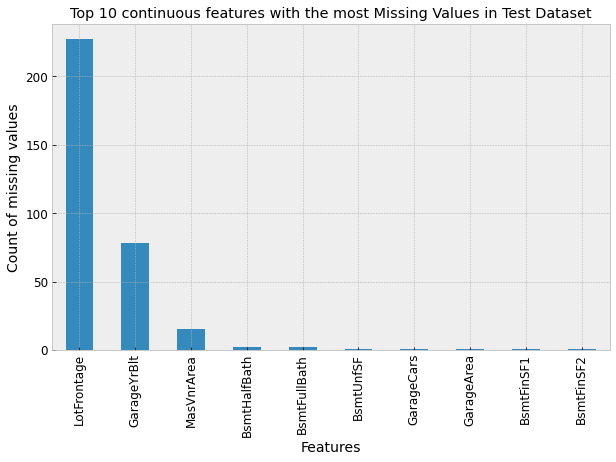

In [46]:
#Count of missing values in continuous columns in test set
missing_values_test=test[test_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
missing_values_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 10 continuous features with the most Missing Values in Test Dataset')
plt.show()

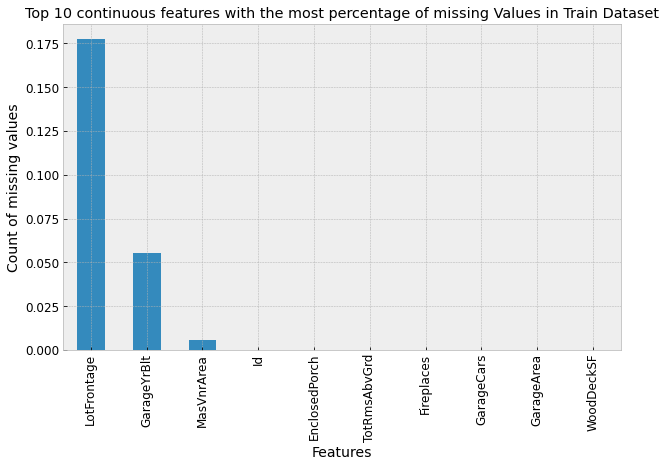

In [47]:
#Percent of null values in first 10 continuous columns in train set
missing_values_percentage_train = train[train_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]/len(train[train_continuous_columns])

plt.figure(figsize=(10, 6))
missing_values_percentage_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 10 continuous features with the most percentage of missing Values in Train Dataset')
plt.show()


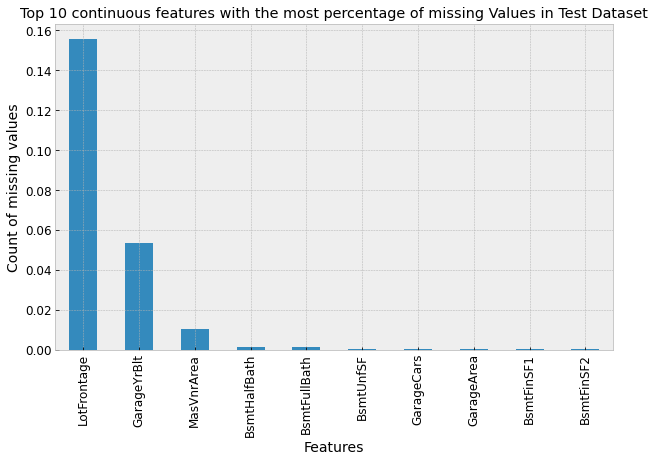

In [48]:
#Percent of null values in first 10 continuous columns in test set
missing_values_percentage_test=test[test_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]/len(train[test_continuous_columns])
plt.figure(figsize=(10, 6))
missing_values_percentage_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 10 continuous features with the most percentage of missing Values in Test Dataset')
plt.show()



In [49]:
#Fill  the null values with mean value of the continuous feature in train and test set
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True)

train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)


train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean(),inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(),inplace=True)


train['BsmtFullBath'].fillna(train['GarageYrBlt'].mean(),inplace=True)
test['BsmtFullBath'].fillna(test['GarageYrBlt'].mean(),inplace=True)


train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean(),inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)


train['GarageCars'].fillna(train['GarageCars'].mean(),inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace=True)


train['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)


train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean(),inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True)


train['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean(),inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)


train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean(),inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(),inplace=True)




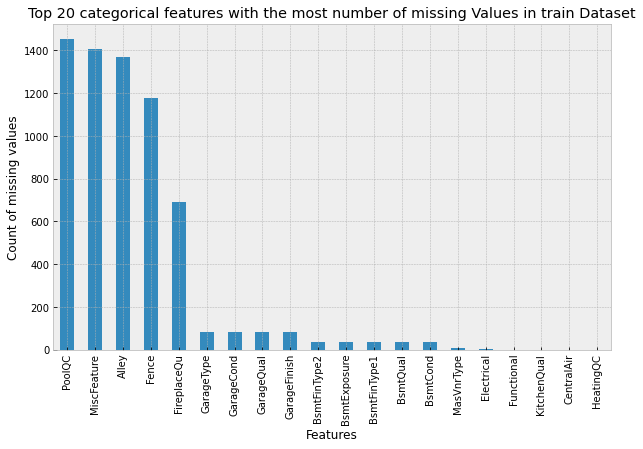

In [158]:
#Count of top 20 missing values in categorical columns in train set
missing_values_train = train[train_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
missing_values_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 20 categorical features with the most number of missing Values in train Dataset')
plt.show()


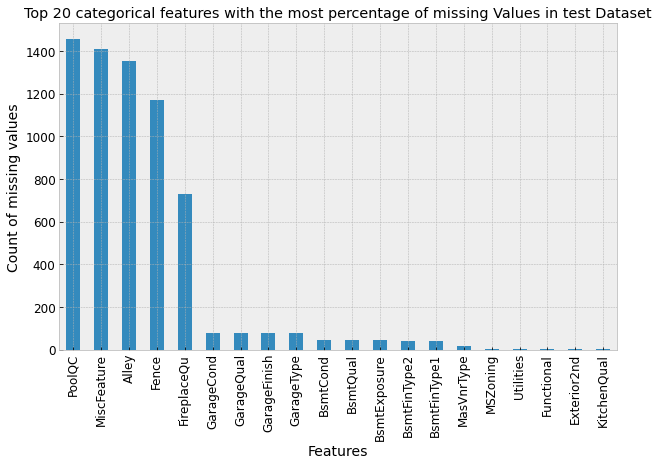

In [50]:
#Count of top 20 missing values in categorical columns in test set

missing_values_test = test[test_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
missing_values_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.title('Top 20 categorical features with the most percentage of missing Values in test Dataset')
plt.show()

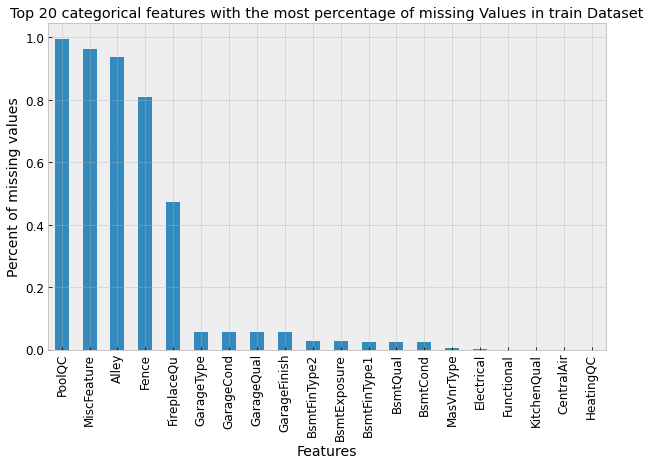

In [51]:
#Percent of null values in first 20 categorical columns in train set
missing_values_train = train[train_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]/len(train[train_categorical_columns])
plt.figure(figsize=(10, 6))
missing_values_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Top 20 categorical features with the most percentage of missing Values in train Dataset')
plt.show()


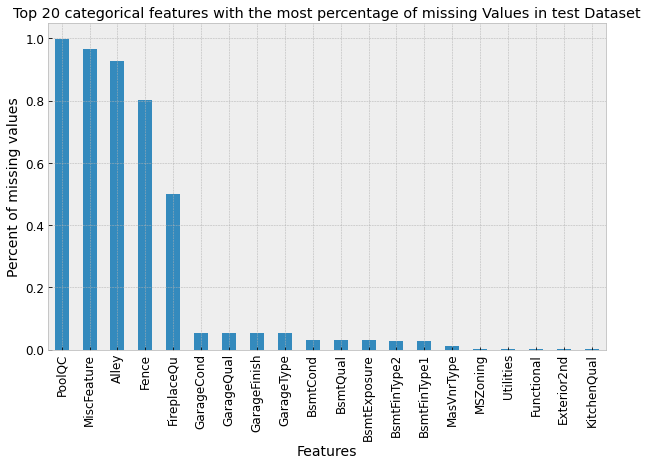

In [52]:
#Percent of null values in first 10 categorical columns in test set
missing_values_test = test[test_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]/len(test[test_categorical_columns])
plt.figure(figsize=(10, 6))
missing_values_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Top 20 categorical features with the most percentage of missing Values in test Dataset')
plt.show()



In [53]:
#Drop below categorical features since they contain high number of null values in train set
train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [54]:
#Drop below categorical features since they contain high number of null values in test set
test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)


In [55]:
#fill null values with most frequently occuring value in each of the below categorical features in train and test set

train['FireplaceQu'].fillna('Gd',inplace=True)
train['GarageCond'].fillna('TA',inplace=True)
train['GarageQual'].fillna('TA',inplace=True)
train['GarageFinish'].fillna('UnF',inplace=True)
train['GarageType'].fillna('Attchd',inplace=True)
train['BsmtCond'].fillna('TA',inplace=True)
train['BsmtQual'].fillna('TA',inplace=True)
train['BsmtExposure'].fillna('No',inplace=True)
train['BsmtFinType2'].fillna('Unf',inplace=True)
train['BsmtFinType1'].fillna('Unf',inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['MSZoning'].fillna('RL',inplace=True)
train['Utilities'].fillna('AllPub',inplace=True)
train['Functional'].fillna('Typ',inplace=True)
train['Exterior2nd'].fillna('VinylSd',inplace=True)
train['KitchenQual'].fillna('TA',inplace=True)

test['FireplaceQu'].fillna('Gd',inplace=True)
test['GarageCond'].fillna('TA',inplace=True)
test['GarageQual'].fillna('TA',inplace=True)
test['GarageFinish'].fillna('UnF',inplace=True)
test['GarageType'].fillna('Attchd',inplace=True)
test['BsmtCond'].fillna('TA',inplace=True)
test['BsmtQual'].fillna('TA',inplace=True)
test['BsmtExposure'].fillna('No',inplace=True)
test['BsmtFinType2'].fillna('Unf',inplace=True)
test['BsmtFinType1'].fillna('Unf',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['MSZoning'].fillna('RL',inplace=True)
test['Utilities'].fillna('AllPub',inplace=True)
test['Functional'].fillna('Typ',inplace=True)
test['Exterior2nd'].fillna('VinylSd',inplace=True)
test['KitchenQual'].fillna('TA',inplace=True)


In [56]:
#Place categorical and continuous features in train and test df
train_df_cat=train.select_dtypes(include='object').columns
test_df_cat=test.select_dtypes(include='object').columns

In [57]:
#Use get_dummies to convert the categorical variable into dummy variables in train set
train=pd.get_dummies(train,columns=train_df_cat,drop_first=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(201)
memory usage: 731.6 KB


In [58]:
#Use get_dummies to convert the categorical variable into dummy variables in test set
test=pd.get_dummies(test,columns=test_df_cat,drop_first=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 223 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(27), uint8(185)
memory usage: 696.9 KB


In [59]:
#Reset indexes of train and test set. It is used to reset the index of a DataFrame or Series, assigning a new default index starting from 0 and updating the existing index values.
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [60]:
X=train[test.columns]
y=train['SalePrice']

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. The train_test_split function takes input data and corresponding labels or target variables and randomly partitions them into separate training and testing sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=9)

# Build a minimum of two separate regression models using the training set.

Linear Regression

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

In [64]:
# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [65]:
#Check whether the model is able to predict the saleprice accurately for the label set(y_test)
y_pred=model.predict(X_test)

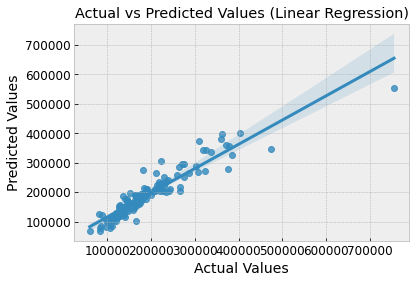

In [66]:
# Create a scatter plot with a regression line
sns.regplot(x=y_test, y=y_pred)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Display the plot
plt.show()

Based on the above plot, there seems to be a linear relationship between the actual saleprice in the test set vs what was predicted by the model. The data points should generally fall along a straight line. They follow a clear linear pattern along the diagonal line, it indicates a strong linear relationship between the actual and predicted values.

In [67]:
#Use the above model to predict unseen data set which was not included in training.
y_pred_n=model.predict(test)

In [68]:
#Add a new column called saleprice_predicted to store the predicted saleprice
predicted_df=pd.DataFrame(data=y_pred_n,columns=['SalePrice_predicted'],index=test.index.copy())

#Merge the test dataset with predicted_df containing the prediction
output = pd.merge(test,predicted_df,left_index=True,right_index=True)

#Export the output to csv
output.to_csv("House_prices_test_data_with_predicted_SalePrice.csv")

# Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

Ridge()

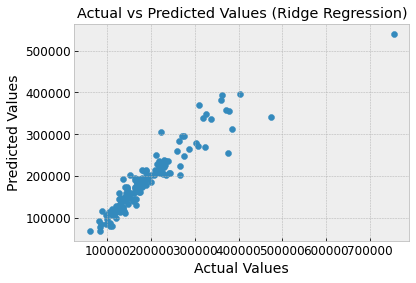

In [70]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.show()


In [75]:
X.drop(['Id','index'], axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 224 is different from 1)

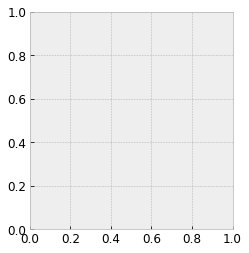

In [80]:
from sklearn.linear_model import Ridge
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

# Lasso Regression

In [181]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+11, tolerance: 8.060e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

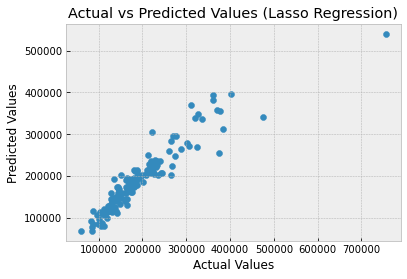

In [231]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_l = lasso_model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.show()


# Evaluate polynomial regression component

In [232]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'X' is your predictor variable and 'y' is your response variable

# Create polynomial features
poly_degree = 2  # Specify the degree of polynomial
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict using the polynomial regression model
y_pred_p = poly_reg.predict(X_poly)



# Goodness of Fit

In [238]:
from sklearn.metrics import r2_score

# y_test is the true 'SalePrice' values and 'y_pred' is the predicted value
r_squared = r2_score(y_test, y_pred) # linear regression
print("R-squared:", r_squared) # linear regression
#R-squared: 0.87


R-squared: 0.8713866448742673


In [239]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_test' is the true 'SalePrice' values and 'y_pred' is the predicted values
mse = mean_squared_error(y_test, y_pred)  # linear regression
print("Mean Squared Error:", mse)

#Mean Squared Error: 982,988,196


Mean Squared Error: 998272223.3707298


In [192]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_true' is the true 'SalePrice' values and 'y_pred' is the predicted values
mse = mean_squared_error(y_test, y_pred)  # linear regression
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

#Root Mean Squared Error: 31352.642579569732

Root Mean Squared Error: 31352.642579569732


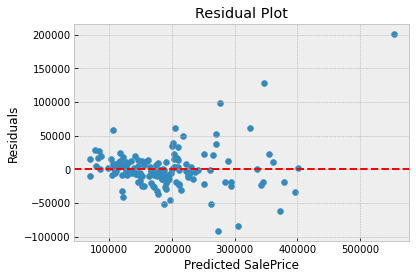

In [193]:
import matplotlib.pyplot as plt

# Assuming 'y_true' is the true 'SalePrice' values and 'y_pred' is the predicted values
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

After analyzing the three evaluation metrics, it looks like the prediction accuracy of the model is good. 
R-squared  measures the proportion of the variance in the dependent variable as explained by the regression model.
The value of 0.87 is close to 1 and indicates that the model is a better fit.It suggests that approximately 87% of the variability in the dependent variable (SalePrice in this case) can be explained by the independent variables included in the model. This indicates a strong relationship between the predictors and the response variable.
Our next metric is the MSE. A lower MSE value indicates better model performance, as it represents the average difference between the predicted values and the true values in the original unit of the dependent variable. In this case, it seems like there are some since the SalePrice values are much smaller ,  the MSE value may indicate a significant deviation.
The RMSE value seems to be lower and is  a better measure compared to the mean square error to assess model performance  since MSE of 982 mill might be due to  an  outlier in the data.

In summary, the goal of the model is to predict sales price using a labeled dataset containing actual sales prices and then also use the model to predict sales prices for an unseen test data set which does not contain the target variable(sales price) and instead use the model to predict the prices for the houses in that data set. Overall, a linear regression model seems to fit better for this dataset. There were missing values in the train and test set and they had to be manually adjusted by imputation methods or dropping the feature or feature values altogether based on its relevance. I struggled with the polynomial regression a bit and would like to learn more about its usefulness when modelling on  datasets of this type. The mean squared error of 87% indicates the model has good predictive power with the existing features. Other modeling algorithms like decision trees and random forest may improve performaance is worth a try. 